In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
import torch.nn.functional as F
from torch import nn
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

import sys
sys.path.append('..')

from src.beam import beam_arguments, Experiment
from src.beam import UniversalDataset, UniversalBatchSampler
from src.beam import Algorithm
from src.beam import LinearNet

from src.beam import DataTensor
from src.beam.utils import is_notebook

from mnist_example import run_mnist, mnist_algorithm_generator

In [2]:
# path_to_data = '/localdata/elads/data/datasets/mnist'
# root_dir = '/localdata/elads/data/resutls'

path_to_data = '/home/shared/data//dataset/mnist'
root_dir = '/home/shared/data/results'

## Training with two workers

In [3]:
# here you put all actions which are performed only once before initializing the workers
# for example, setting running arguments and experiment:

args = beam_arguments(f"--project-name=mnist --root-dir={root_dir} --algorithm=MNISTAlgorithm",
                      "--epoch-length=100000 --n-epochs=2 --clip=1 --parallel=2 --override",
                      path_to_data=path_to_data)

experiment = Experiment(args)

2022-07-17 11:18:29 | INFO | Deleting old experiment
2022-07-17 11:18:29 | INFO | Experiment directory is: /home/shared/data/results/mnist/MNISTAlgorithm/debug/0096_20220717_111829
2022-07-17 11:18:29 | INFO | beam project: mnist
2022-07-17 11:18:29 | INFO | Experiment Hyperparameters
2022-07-17 11:18:29 | INFO | project_name: mnist
2022-07-17 11:18:29 | INFO | algorithm: MNISTAlgorithm
2022-07-17 11:18:29 | INFO | identifier: debug
2022-07-17 11:18:29 | INFO | mp_port: random
2022-07-17 11:18:29 | INFO | root_dir: /home/shared/data/results
2022-07-17 11:18:29 | INFO | reload: False
2022-07-17 11:18:29 | INFO | resume: -1
2022-07-17 11:18:29 | INFO | override: True
2022-07-17 11:18:29 | INFO | cpu_workers: 0
2022-07-17 11:18:29 | INFO | device: 0
2022-07-17 11:18:29 | INFO | parallel: 2
2022-07-17 11:18:29 | INFO | tensorboard: True
2022-07-17 11:18:29 | INFO | lognet: True
2022-07-17 11:18:29 | INFO | deterministic: False
2022-07-17 11:18:29 | INFO | scale_epoch_by_batch_size: True
20

In [4]:
alg = experiment(mnist_algorithm_generator)

2022-07-14 13:50:42 | INFO     | Initializing 2 parallel workers
2022-07-14 13:50:42 | INFO     | Multiprocessing port is: 50373


[W socket.cpp:558] [c10d] The client socket has failed to connect to [localhost]:50373 (errno: 99 - Cannot assign requested address).


2022-07-14 13:50:45 | INFO     | Worker: 2/2 is running...
2022-07-14 13:50:46 | INFO     | Worker: 1/2 is running...


2022-07-14 13:50:53.697103: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
validation: 100%|██████████| 389/389 [00:01<00:00, 200.82it/s]

2022-07-14 13:51:02 | INFO     | 
2022-07-14 13:51:02 | INFO     | Finished epoch 1/2:
2022-07-14 13:51:02 | INFO     | train:
2022-07-14 13:51:02 | INFO     | loss:           | avg: 0.3067    | std: 0.3881    | min: 0.04603   | 25%: 0.1278    | 50%: 0.2004    | 75%: 0.3075    | max: 2.303     
2022-07-14 13:51:02 | INFO     | acc:            | avg: 0.9125    | std: 0.1094    | min: 0.1094    | 25%: 0.9062    | 50%: 0.9414    | 75%: 0.9609    | max: 0.9883    
2022-07-14 13:51:02 | INFO     | lr:             | avg: 0.00099   | std: nan       | min: 0.00099   | 25%: 0.00099   | 50%: 0.00099   | 75%: 0.00099   | max: 0.00099   
2022-07-14 13:51:02 | INFO     | validation:
2022-07-14 13:51:02 | INFO     | loss:           | avg: 0.1292    | std: 0.03799   | min: 0.03749   | 25%: 0.1026    | 50%: 0.128     | 75%: 0.1543    | max: 0.2916    
2022-07-14 13:51:02 | INFO     | acc:            | avg: 0.9601    | std: 0.01262   | min: 0.9258    | 25%: 0.9531    | 50%: 0.9609    | 75%: 0.9688    |


validation: 100%|██████████| 389/389 [00:02<00:00, 159.37it/s]

2022-07-14 13:51:09 | INFO     | 
2022-07-14 13:51:09 | INFO     | Finished epoch 2/2:
2022-07-14 13:51:09 | INFO     | train:
2022-07-14 13:51:09 | INFO     | loss:           | avg: 0.06059   | std: 0.02807   | min: 0.008321  | 25%: 0.03999   | 50%: 0.05664   | 75%: 0.07663   | max: 0.1495    
2022-07-14 13:51:09 | INFO     | acc:            | avg: 0.9823    | std: 0.009245  | min: 0.9531    | 25%: 0.9766    | 50%: 0.9844    | 75%: 0.9883    | max: 1.0       
2022-07-14 13:51:09 | INFO     | lr:             | avg: 0.0009801 | std: nan       | min: 0.0009801 | 25%: 0.0009801 | 50%: 0.0009801 | 75%: 0.0009801 | max: 0.0009801 
2022-07-14 13:51:09 | INFO     | validation:
2022-07-14 13:51:09 | INFO     | loss:           | avg: 0.08654   | std: 0.03232   | min: 0.02153   | 25%: 0.06247   | 50%: 0.08078   | 75%: 0.1068    | max: 0.1949    
2022-07-14 13:51:09 | INFO     | acc:            | avg: 0.9737    | std: 0.009799  | min: 0.9375    | 25%: 0.9688    | 50%: 0.9766    | 75%: 0.9805    |

In [7]:
results = alg.evaluate('test')

test:   0%|          | 0/40 [00:00<?, ?it/s]

In [14]:
y_pred = torch.cat(results['predictions']['y_pred'])

In [19]:
target = torch.cat(results['predictions']['target'])

In [20]:
target

tensor([7, 2, 1,  ..., 4, 5, 6], device='cuda:0')

In [25]:
results['predictions'].keys()

dict_keys(['y_pred', 'target'])

In [24]:
results['metrics'].keys()

dict_keys(['precision', 'recall', 'fscore', 'support'])

In [19]:
experiment.tensorboard()

13002


## Training with a single worker

In [3]:
# here you put all actions which are performed only once before initializing the workers
# for example, setting running arguments and experiment:

args = beam_arguments(f"--project-name=mnist --root-dir={root_dir} --algorithm=MNISTAlgorithm --amp  --device=cpu   ", 
                      "--epoch-length=200000 --n-epochs=2 --clip=1 --parallel=1", path_to_data=path_to_data)

experiment = Experiment(args)

2022-07-17 14:39:06 | INFO | Creating new experiment
2022-07-17 14:39:06 | INFO | Experiment directory is: /home/shared/data/results/mnist/MNISTAlgorithm/debug/0003_20220717_143906
2022-07-17 14:39:06 | INFO | beam project: mnist
2022-07-17 14:39:06 | INFO | Experiment Hyperparameters
2022-07-17 14:39:06 | INFO | project_name: mnist
2022-07-17 14:39:06 | INFO | algorithm: MNISTAlgorithm
2022-07-17 14:39:06 | INFO | identifier: debug
2022-07-17 14:39:06 | INFO | mp_port: random
2022-07-17 14:39:06 | INFO | root_dir: /home/shared/data/results
2022-07-17 14:39:06 | INFO | reload: False
2022-07-17 14:39:06 | INFO | resume: -1
2022-07-17 14:39:06 | INFO | override: False
2022-07-17 14:39:06 | INFO | cpu_workers: 0
2022-07-17 14:39:06 | INFO | device: cpu
2022-07-17 14:39:06 | INFO | parallel: 1
2022-07-17 14:39:06 | INFO | tensorboard: True
2022-07-17 14:39:06 | INFO | lognet: True
2022-07-17 14:39:06 | INFO | deterministic: False
2022-07-17 14:39:06 | INFO | scale_epoch_by_batch_size: True

we can generate an untrained algorithm with

In [4]:
# alg = mnist_algorithm_generator(experiment)

In [5]:
# alg.fit()

or we can apply the default training routin with

In [6]:
alg = experiment(mnist_algorithm_generator)

2022-07-17 14:39:08 | INFO | Single worker mode
2022-07-17 14:39:08 | INFO | Worker: 1/1 is running...


train:   7%|6         | 54/780 [00:00<?, ?it/s]

2022-07-17 14:39:22 | INFO | 
2022-07-17 14:39:22 | INFO | Finished epoch 1/2:
2022-07-17 14:39:22 | INFO | train:
2022-07-17 14:39:22 | INFO | seconds:  13.32 | batches: 780 | samples:  1.997e+05 | batch_rate:  58.58 [iter/sec] | sample_rate:  1.5e+04 [iter/sec] 
2022-07-17 14:39:22 | INFO | loss:        | avg: 0.2152    | std: 0.3088    | min: 0.01614   | 25%: 0.08416   | 50%: 0.1293    | 75%: 0.2252    | max: 2.306     
2022-07-17 14:39:22 | INFO | acc:         | avg: 0.9384    | std: 0.0844    | min: 0.07422   | 25%: 0.9336    | 50%: 0.9609    | 75%: 0.9766    | max: 1.0       
2022-07-17 14:39:22 | INFO | lr:          | avg: 0.00099   | std: nan       | min: 0.00099   | 25%: 0.00099   | 50%: 0.00099   | 75%: 0.00099   | max: 0.00099   
2022-07-17 14:39:22 | INFO | validation:
2022-07-17 14:39:22 | INFO | seconds:  1.022 | batches: 780 | samples:  1.997e+05 | batch_rate:  763.2 [iter/sec] | sample_rate:  1.954e+05 [iter/sec] 
2022-07-17 14:39:22 | INFO | loss:        | avg: 0.09616

we can now access the trained algorithm

In [13]:
alg.networks['net']

LinearNet(
  (lin): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=10, bias=True)
  )
)

## Inference

In [14]:
inference = alg('test')

# print('Test inference results:')
# for n, v in inference['metrics'].items():
#     print(f'{n}:')
#     print(v)

we can also run our own experiment routine and obtain the results

In [10]:
alg, results = experiment.run(run_mnist)

2022-06-01 19:58:59.572 | INFO     | src.beam.experiment:run:425 - Single worker mode
2022-06-01 19:58:59.573 | INFO     | src.beam.experiment:run_worker:45 - Worker: 1/1 is running...


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-01 19:59:01.451 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 3/2:
2022-06-01 19:59:01.456 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-01 19:59:01.457 | INFO     | src.beam.experiment:log_data:344 - loss 0.333092 	|
2022-06-01 19:59:01.458 | INFO     | src.beam.experiment:log_data:344 - acc 0.904935 	|
2022-06-01 19:59:01.459 | INFO     | src.beam.experiment:log_data:344 - lr 0.00099 	|
2022-06-01 19:59:01.460 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-01 19:59:01.461 | INFO     | src.beam.experiment:log_data:344 - loss 0.136295 	|
2022-06-01 19:59:01.462 | INFO     | src.beam.experiment:log_data:344 - acc 0.958618 	|


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-01 19:59:03.455 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 4/2:
2022-06-01 19:59:03.459 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-01 19:59:03.460 | INFO     | src.beam.experiment:log_data:344 - loss 0.0878459 	|
2022-06-01 19:59:03.461 | INFO     | src.beam.experiment:log_data:344 - acc 0.973289 	|
2022-06-01 19:59:03.461 | INFO     | src.beam.experiment:log_data:344 - lr 0.0009801 	|
2022-06-01 19:59:03.462 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-01 19:59:03.463 | INFO     | src.beam.experiment:log_data:344 - loss 0.0949364 	|
2022-06-01 19:59:03.463 | INFO     | src.beam.experiment:log_data:344 - acc 0.971692 	|


In [11]:
np.mean(results['validation']['scalar']['loss'])

0.09493644842949808

## Inference

In [12]:
inference = alg('test')

print('Test inference results:')
for n, v in inference['metrics'].items():
    print(f'{n}:')
    print(v)

test:   0%|          | 0/39 [00:00<?, ?it/s]

Test inference results:
precision:
[0.97683787 0.98423818 0.97019231 0.94676806 0.960199   0.98484848
 0.96707819 0.9707887  0.9697286  0.98740818]
recall:
[0.98979592 0.99030837 0.97771318 0.98613861 0.98268839 0.94730942
 0.98121086 0.96984436 0.95379877 0.93260654]
fscore:
[0.9832742  0.98726394 0.97393822 0.96605238 0.97131354 0.96571429
 0.97409326 0.9703163  0.96169772 0.95922528]
support:
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


## Reload algorithm and resume training

In [16]:
# here you put all actions which are performed only once before initializing the workers
# for example, setting running arguments and experiment:

args = beam_arguments(f"--project-name=mnist --root-dir={root_dir} --algorithm=MNISTAlgorithm",
                      "--epoch-length=100000 --n-epochs=2 --clip=1 --parallel=1 --reload", 
                      path_to_data=path_to_data)

experiment = Experiment(args)

2022-06-01 20:00:10.595 | INFO     | src.beam.experiment:__init__:94 - beam project: mnist
2022-06-01 20:00:10.596 | INFO     | src.beam.experiment:__init__:95 - Simulation Hyperparameters
2022-06-01 20:00:10.598 | INFO     | src.beam.experiment:__init__:99 - project_name: mnist
2022-06-01 20:00:10.599 | INFO     | src.beam.experiment:__init__:99 - identifier: debug
2022-06-01 20:00:10.600 | INFO     | src.beam.experiment:__init__:99 - algorithm: MNISTAlgorithm
2022-06-01 20:00:10.601 | INFO     | src.beam.experiment:__init__:99 - mp_port: None
2022-06-01 20:00:10.602 | INFO     | src.beam.experiment:__init__:99 - root_dir: /localdata/elads/data/resutls
2022-06-01 20:00:10.603 | INFO     | src.beam.experiment:__init__:99 - reload: True
2022-06-01 20:00:10.605 | INFO     | src.beam.experiment:__init__:99 - resume: -1
2022-06-01 20:00:10.606 | INFO     | src.beam.experiment:__init__:99 - override: False
2022-06-01 20:00:10.607 | INFO     | src.beam.experiment:__init__:99 - cpu_workers: 0

In [17]:
alg = experiment(mnist_algorithm_generator)

2022-06-01 20:00:13.889 | INFO     | src.beam.experiment:run:425 - Single worker mode
2022-06-01 20:00:13.891 | INFO     | src.beam.experiment:run_worker:45 - Worker: 1/1 is running...
2022-06-01 20:00:13.989 | INFO     | src.beam.experiment:reload_checkpoint:245 - Reload experiment from checkpoint: /localdata/elads/data/resutls/mnist/MNISTAlgorithm/debug/0001_20220601_194628/checkpoints/checkpoint_000004


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-01 20:00:15.814 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 1/2:
2022-06-01 20:00:15.820 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-01 20:00:15.820 | INFO     | src.beam.experiment:log_data:344 - loss 0.0471516 	|
2022-06-01 20:00:15.821 | INFO     | src.beam.experiment:log_data:344 - acc 0.985791 	|
2022-06-01 20:00:15.821 | INFO     | src.beam.experiment:log_data:344 - lr 0.000970299 	|
2022-06-01 20:00:15.822 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-01 20:00:15.823 | INFO     | src.beam.experiment:log_data:344 - loss 0.092408 	|
2022-06-01 20:00:15.823 | INFO     | src.beam.experiment:log_data:344 - acc 0.973329 	|


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-01 20:00:17.862 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 2/2:
2022-06-01 20:00:17.867 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-01 20:00:17.867 | INFO     | src.beam.experiment:log_data:344 - loss 0.0272187 	|
2022-06-01 20:00:17.868 | INFO     | src.beam.experiment:log_data:344 - acc 0.991716 	|
2022-06-01 20:00:17.869 | INFO     | src.beam.experiment:log_data:344 - lr 0.000960596 	|
2022-06-01 20:00:17.869 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-01 20:00:17.870 | INFO     | src.beam.experiment:log_data:344 - loss 0.100829 	|
2022-06-01 20:00:17.871 | INFO     | src.beam.experiment:log_data:344 - acc 0.972496 	|


## Training with two workers

In [3]:
# here you put all actions which are performed only once before initializing the workers
# for example, setting running arguments and experiment:

args = beam_arguments(f"--project-name=mnist --root-dir={root_dir} --algorithm=MNISTAlgorithm",
                      "--epoch-length=100000 --n-epochs=2 --clip=1 --parallel=2",
                      path_to_data=path_to_data)

experiment = Experiment(args)

2022-07-10 12:07:40 | INFO     | Creating new experiment
2022-07-10 12:07:40 | INFO     | Experiment directory is: /home/shared/data/results/mnist/MNISTAlgorithm/debug/0038_20220710_120740
2022-07-10 12:07:40 | INFO     | beam project: mnist
2022-07-10 12:07:40 | INFO     | Experiment Hyperparameters
2022-07-10 12:07:40 | INFO     | project_name: mnist
2022-07-10 12:07:40 | INFO     | algorithm: MNISTAlgorithm
2022-07-10 12:07:40 | INFO     | identifier: debug
2022-07-10 12:07:40 | INFO     | mp_port: random
2022-07-10 12:07:40 | INFO     | root_dir: /home/shared/data/results
2022-07-10 12:07:40 | INFO     | reload: False
2022-07-10 12:07:40 | INFO     | resume: -1
2022-07-10 12:07:40 | INFO     | override: False
2022-07-10 12:07:40 | INFO     | cpu_workers: 0
2022-07-10 12:07:40 | INFO     | device: 0
2022-07-10 12:07:40 | INFO     | parallel: 2
2022-07-10 12:07:40 | INFO     | tensorboard: True
2022-07-10 12:07:40 | INFO     | lognet: True
2022-07-10 12:07:40 | INFO     | determinist

In [4]:
alg = experiment(mnist_algorithm_generator)

2022-07-10 12:07:41 | INFO     | Initializing 2 parallel workers
2022-07-10 12:07:41 | INFO     | Multiprocessing port is: 38005
2022-07-10 12:07:44 | INFO     | Worker: 1/2 is running...
2022-07-10 12:07:44 | INFO     | Worker: 2/2 is running...


validation:  82%|████████▏ | 320/389 [00:00<00:00, 505.30it/s]

2022-07-10 12:07:54 | INFO     | 
2022-07-10 12:07:54 | INFO     | Finished epoch 1/2:
2022-07-10 12:07:54 | INFO     | train:
2022-07-10 12:07:54 | INFO     | loss:           | avg: 0.3006    | std: 0.397     | min: 0.05101   | 25%: 0.1202    | 50%: 0.1742    | 75%: 0.313     | max: 2.308     
2022-07-10 12:07:54 | INFO     | acc:            | avg: 0.9158    | std: 0.1075    | min: 0.07422   | 25%: 0.9141    | 50%: 0.9492    | 75%: 0.9648    | max: 0.9922    
2022-07-10 12:07:54 | INFO     | lr:             | avg: 0.00099   | std: nan       | min: 0.00099   | 25%: 0.00099   | 50%: 0.00099   | 75%: 0.00099   | max: 0.00099   
2022-07-10 12:07:54 | INFO     | validation:
2022-07-10 12:07:54 | INFO     | loss:           | avg: 0.1161    | std: 0.03172   | min: 0.03283   | 25%: 0.09396   | 50%: 0.1153    | 75%: 0.139     | max: 0.2225    
2022-07-10 12:07:54 | INFO     | acc:            | avg: 0.965     | std: 0.01114   | min: 0.9141    | 25%: 0.957     | 50%: 0.9648    | 75%: 0.9727    |

validation: 100%|██████████| 389/389 [00:00<00:00, 465.04it/s]

2022-07-10 12:07:59 | INFO     | 
2022-07-10 12:07:59 | INFO     | Finished epoch 2/2:
2022-07-10 12:07:59 | INFO     | train:
2022-07-10 12:07:59 | INFO     | loss:           | avg: 0.05898   | std: 0.02831   | min: 0.01156   | 25%: 0.03746   | 50%: 0.0552    | 75%: 0.07635   | max: 0.1828    
2022-07-10 12:07:59 | INFO     | acc:            | avg: 0.9825    | std: 0.009262  | min: 0.9492    | 25%: 0.9766    | 50%: 0.9844    | 75%: 0.9883    | max: 1.0       
2022-07-10 12:07:59 | INFO     | lr:             | avg: 0.0009801 | std: nan       | min: 0.0009801 | 25%: 0.0009801 | 50%: 0.0009801 | 75%: 0.0009801 | max: 0.0009801 
2022-07-10 12:07:59 | INFO     | validation:
2022-07-10 12:07:59 | INFO     | loss:           | avg: 0.09789   | std: 0.03572   | min: 0.01559   | 25%: 0.07137   | 50%: 0.09426   | 75%: 0.1214    | max: 0.2434    
2022-07-10 12:07:59 | INFO     | acc:            | avg: 0.9722    | std: 0.009782  | min: 0.9414    | 25%: 0.9648    | 50%: 0.9727    | 75%: 0.9766    |

RuntimeError: Error(s) in loading state_dict for LinearNet:
	Missing key(s) in state_dict: "lin.0.weight", "lin.0.bias", "lin.2.weight", "lin.2.bias", "lin.4.weight", "lin.4.bias", "lin.6.weight", "lin.6.bias". 
	Unexpected key(s) in state_dict: "module.lin.0.bias", "module.lin.0.weight", "module.lin.2.bias", "module.lin.2.weight", "module.lin.4.bias", "module.lin.4.weight", "module.lin.6.bias", "module.lin.6.weight". 

Inference works the same if we use the default runner, the runner reloads the stored algorithm into a single GPU mode

In [21]:
inference = alg('test')

print('Test inference results:')
for n, v in inference['metrics'].items():
    print(f'{n}:')
    print(v)

test:   0%|          | 0/39 [00:00<?, ?it/s]

Test inference results:
precision:
[0.97197197 0.98854626 0.98039216 0.98301698 0.97626419 0.99649123
 0.97401247 0.97189922 0.95070423 0.95546951]
recall:
[0.99081633 0.98854626 0.96899225 0.97425743 0.96334012 0.95515695
 0.97807933 0.97568093 0.97022587 0.97819623]
fscore:
[0.98130369 0.98854626 0.97465887 0.9786176  0.9697591  0.97538638
 0.97604167 0.97378641 0.96036585 0.96669931]
support:
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


we can also determine our own experiment routine and return the results

In [22]:
# here we initialize the workers (can be single or multiple workers, depending on the configuration)
results = experiment.run(run_mnist)

2022-06-01 20:01:40.633 | INFO     | src.beam.experiment:run:416 - Initializing 2 parallel workers
2022-06-01 20:01:40.635 | INFO     | src.beam.experiment:run:421 - Multiprocessing port is: 58869
2022-06-01 20:01:42.335 | INFO     | src.beam.experiment:run_worker:45 - Worker: 1/2 is running...
2022-06-01 20:01:42.338 | INFO     | src.beam.experiment:run_worker:45 - Worker: 2/2 is running...


validation: 100%|██████████| 389/389 [00:00<00:00, 868.94it/s]


2022-06-01 20:01:50.405 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 1/2:
2022-06-01 20:01:50.441 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-01 20:01:50.441 | INFO     | src.beam.experiment:log_data:344 - loss 0.303975 	|
2022-06-01 20:01:50.441 | INFO     | src.beam.experiment:log_data:344 - acc 0.912275 	|
2022-06-01 20:01:50.442 | INFO     | src.beam.experiment:log_data:344 - lr 0.00099 	|
2022-06-01 20:01:50.442 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-01 20:01:50.442 | INFO     | src.beam.experiment:log_data:344 - loss 0.125878 	|
2022-06-01 20:01:50.443 | INFO     | src.beam.experiment:log_data:344 - acc 0.962655 	|



validation:  93%|█████████▎| 362/389 [00:00<00:00, 905.36it/s]]


2022-06-01 20:01:53.253 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 2/2:
2022-06-01 20:01:53.286 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-01 20:01:53.286 | INFO     | src.beam.experiment:log_data:344 - loss 0.0635221 	|
2022-06-01 20:01:53.286 | INFO     | src.beam.experiment:log_data:344 - acc 0.981091 	|
2022-06-01 20:01:53.286 | INFO     | src.beam.experiment:log_data:344 - lr 0.0009801 	|
2022-06-01 20:01:53.286 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-01 20:01:53.286 | INFO     | src.beam.experiment:log_data:344 - loss 0.0866934 	|
2022-06-01 20:01:53.286 | INFO     | src.beam.experiment:log_data:344 - acc 0.973359 	|


validation: 100%|██████████| 389/389 [00:00<00:00, 494.49it/s]

In [23]:
np.mean(results[1]['results']['validation']['scalar']['loss'])

0.08673303388537969

### Prediction on new data

In [66]:
alg = mnist_algorithm_generator(experiment).fit()

2022-06-09 08:45:49.809 | INFO     | src.beam.experiment:run:425 - Single worker mode
2022-06-09 08:45:49.810 | INFO     | src.beam.experiment:run_worker:45 - Worker: 1/1 is running...


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-09 08:45:51.544 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 11/2:
2022-06-09 08:45:51.548 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-09 08:45:51.549 | INFO     | src.beam.experiment:log_data:344 - loss 0.344566 	|
2022-06-09 08:45:51.550 | INFO     | src.beam.experiment:log_data:344 - acc 0.900155 	|
2022-06-09 08:45:51.550 | INFO     | src.beam.experiment:log_data:344 - lr 0.00099 	|
2022-06-09 08:45:51.551 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-09 08:45:51.552 | INFO     | src.beam.experiment:log_data:344 - loss 0.138415 	|
2022-06-09 08:45:51.552 | INFO     | src.beam.experiment:log_data:344 - acc 0.957945 	|


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-09 08:45:53.273 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 12/2:
2022-06-09 08:45:53.276 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-09 08:45:53.276 | INFO     | src.beam.experiment:log_data:344 - loss 0.0878807 	|
2022-06-09 08:45:53.277 | INFO     | src.beam.experiment:log_data:344 - acc 0.972686 	|
2022-06-09 08:45:53.277 | INFO     | src.beam.experiment:log_data:344 - lr 0.0009801 	|
2022-06-09 08:45:53.278 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-09 08:45:53.278 | INFO     | src.beam.experiment:log_data:344 - loss 0.114651 	|
2022-06-09 08:45:53.279 | INFO     | src.beam.experiment:log_data:344 - acc 0.964653 	|


lets simulate new data

In [20]:
from src.beam import check_type

In [67]:
ind, examples = alg.dataset[np.random.choice(len(alg.dataset), size=5000000, replace=True)]

In [71]:
examples['x'].shape

torch.Size([5000000, 28, 28])

In [103]:
res = alg.predict(examples['x'])

predict:   4%|4         | 795/19532 [00:00<?, ?it/s]

In [104]:
res[10:12]

(tensor([10, 11]),
 tensor([[ -1.1058,  -5.2819,   6.7675,  -4.5221,  -1.9823,  -0.1221,  12.8147,
           -6.2498,  -3.5055, -11.7264],
         [  5.1575,  -5.3089,  -1.4568,  -5.4518,  -1.2298,   3.0352,   9.2063,
           -4.4982,  -5.5891,  -3.6312]]))

In [99]:
res = alg.predict(examples['x'], lazy=True)

In [105]:
res[10:1100]

(tensor([  10,   11,   12,  ..., 1097, 1098, 1099]),
 tensor([[ -1.1058,  -5.2819,   6.7675,  ...,  -6.2498,  -3.5055, -11.7264],
         [  5.1575,  -5.3089,  -1.4568,  ...,  -4.4982,  -5.5891,  -3.6312],
         [ -6.6506,   8.8380,  -4.0550,  ...,  -0.4406,   0.0359,  -2.0613],
         ...,
         [ -2.2278,  -4.8034,   1.0642,  ...,  14.1449,  -2.5991,   3.3570],
         [ -3.1427,  -6.0882,  -2.7378,  ...,  -9.8531,  12.0196,   1.0947],
         [ -2.8209,  -9.3018,  -1.1522,  ...,  -7.7489,  12.8719,   2.1492]]))

In [98]:
dataset.data

tensor([[ -1.1058,  -5.2819,   6.7675,  -4.5221,  -1.9823,  -0.1221,  12.8147,
          -6.2498,  -3.5055, -11.7264]])

In [95]:
type(x)

src.beam.dataset.UniversalDataset

In [49]:
hparams = beam_arguments(get_cifar10_parser(), f"--project-name=cifar10 --root-dir=/tmp/cifar --algorithm=CIFAR10Algorithm --device=0 --amp --lr-d=1e-2 --batch-size=512",
                      "--n-epochs=4 --clip-gradient=1000 --parallel=1 --accumulate=1 --no-deterministic",
                      "--weight-decay=3e-5 --beta1=0.9")

Lets call a new experiment instance. We can avoid printing all the hyperparameters by setting the argument ```print_hyperparameters=False```

In [50]:
experiment = Experiment(hparams, print_hyperparameters=False)

2022-07-12 12:46:54 | INFO     | Creating new experiment
2022-07-12 12:46:54 | INFO     | Experiment directory is: /tmp/cifar/cifar10/CIFAR10Algorithm/debug/0027_20220712_124654


In [51]:
from cifar10_example import CIFAR10Algorithm

In [52]:
alg = experiment.fit(CIFAR10Algorithm, CIFAR10Dataset)

2022-07-12 12:46:56 | INFO     | Single worker mode
2022-07-12 12:46:56 | INFO     | Worker: 1/1 is running...


train:   0%|          | 0/73 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


validation:   0%|          | 0/22 [00:00<?, ?it/s]

2022-07-12 12:47:03 | INFO     | 
2022-07-12 12:47:03 | INFO     | Finished epoch 1/4:
2022-07-12 12:47:03 | INFO     | train:
2022-07-12 12:47:03 | INFO     | loss:           | avg: 917.5     | std: 113.0     | min: 751.2     | 25%: 831.8     | 50%: 889.4     | 75%: 991.5     | max: 1.182e+03 
2022-07-12 12:47:03 | INFO     | acc:            | avg: 0.4674    | std: 0.1441    | min: 0.09375   | 25%: 0.3828    | 50%: 0.502     | 75%: 0.5762    | max: 0.6699    
2022-07-12 12:47:03 | INFO     | lr:             | avg: 0.0005    | std: nan       | min: 0.0005    | 25%: 0.0005    | 50%: 0.0005    | 75%: 0.0005    | max: 0.0005    
2022-07-12 12:47:03 | INFO     | validation:
2022-07-12 12:47:03 | INFO     | loss:           | avg: 792.5     | std: 13.57     | min: 765.9     | 25%: 783.1     | 50%: 794.2     | 75%: 802.1     | max: 818.6     
2022-07-12 12:47:03 | INFO     | acc:            | avg: 0.6274    | std: 0.02524   | min: 0.584     | 25%: 0.6113    | 50%: 0.625     | 75%: 0.6455    |

train:   0%|          | 0/73 [00:00<?, ?it/s]

validation:   0%|          | 0/22 [00:00<?, ?it/s]

2022-07-12 12:47:13 | INFO     | 
2022-07-12 12:47:13 | INFO     | Finished epoch 2/4:
2022-07-12 12:47:13 | INFO     | train:
2022-07-12 12:47:13 | INFO     | loss:           | avg: 726.7     | std: 36.77     | min: 653.2     | 25%: 699.6     | 50%: 724.7     | 75%: 748.3     | max: 818.5     
2022-07-12 12:47:13 | INFO     | acc:            | avg: 0.7087    | std: 0.04844   | min: 0.5996    | 25%: 0.6738    | 50%: 0.709     | 75%: 0.7461    | max: 0.7969    
2022-07-12 12:47:13 | INFO     | lr:             | avg: 0.0005703 | std: nan       | min: 0.0005703 | 25%: 0.0005703 | 50%: 0.0005703 | 75%: 0.0005703 | max: 0.0005703 
2022-07-12 12:47:13 | INFO     | validation:
2022-07-12 12:47:13 | INFO     | loss:           | avg: 747.1     | std: 12.14     | min: 728.0     | 25%: 736.4     | 50%: 748.0     | 75%: 756.4     | max: 766.9     
2022-07-12 12:47:13 | INFO     | acc:            | avg: 0.6969    | std: 0.01681   | min: 0.6621    | 25%: 0.6841    | 50%: 0.7002    | 75%: 0.709     |

train:   0%|          | 0/73 [00:00<?, ?it/s]

validation:   0%|          | 0/22 [00:00<?, ?it/s]

2022-07-12 12:47:22 | INFO     | 
2022-07-12 12:47:22 | INFO     | Finished epoch 3/4:
2022-07-12 12:47:22 | INFO     | train:
2022-07-12 12:47:22 | INFO     | loss:           | avg: 663.8     | std: 18.9      | min: 617.6     | 25%: 650.0     | 50%: 662.6     | 75%: 678.2     | max: 717.6     
2022-07-12 12:47:22 | INFO     | acc:            | avg: 0.7866    | std: 0.02445   | min: 0.7324    | 25%: 0.7695    | 50%: 0.7891    | 75%: 0.8047    | max: 0.8496    
2022-07-12 12:47:22 | INFO     | lr:             | avg: 0.0008555 | std: nan       | min: 0.0008555 | 25%: 0.0008555 | 50%: 0.0008555 | 75%: 0.0008555 | max: 0.0008555 
2022-07-12 12:47:22 | INFO     | validation:
2022-07-12 12:47:22 | INFO     | loss:           | avg: 680.1     | std: 13.69     | min: 650.6     | 25%: 675.3     | 50%: 682.1     | 75%: 686.8     | max: 700.4     
2022-07-12 12:47:22 | INFO     | acc:            | avg: 0.7733    | std: 0.01546   | min: 0.7441    | 25%: 0.7676    | 50%: 0.7744    | 75%: 0.7808    |

train:   0%|          | 0/73 [00:00<?, ?it/s]

validation:   0%|          | 0/22 [00:00<?, ?it/s]

2022-07-12 12:47:32 | INFO     | 
2022-07-12 12:47:32 | INFO     | Finished epoch 4/4:
2022-07-12 12:47:32 | INFO     | train:
2022-07-12 12:47:32 | INFO     | loss:           | avg: 633.6     | std: 16.54     | min: 604.0     | 25%: 621.5     | 50%: 629.8     | 75%: 644.9     | max: 689.0     
2022-07-12 12:47:32 | INFO     | acc:            | avg: 0.8224    | std: 0.02249   | min: 0.7539    | 25%: 0.8086    | 50%: 0.8281    | 75%: 0.8398    | max: 0.8594    
2022-07-12 12:47:32 | INFO     | lr:             | avg: 0.001141  | std: nan       | min: 0.001141  | 25%: 0.001141  | 50%: 0.001141  | 75%: 0.001141  | max: 0.001141  
2022-07-12 12:47:32 | INFO     | validation:
2022-07-12 12:47:32 | INFO     | loss:           | avg: 646.7     | std: 9.117     | min: 626.8     | 25%: 641.5     | 50%: 647.7     | 75%: 651.7     | max: 664.7     
2022-07-12 12:47:32 | INFO     | acc:            | avg: 0.8066    | std: 0.01537   | min: 0.7871    | 25%: 0.7969    | 50%: 0.8018    | 75%: 0.814     |

In [83]:
res[ind[:4900000]].values.shape

predict:   7%|7         | 1344/19141 [00:00<?, ?it/s]

torch.Size([4900000, 10])

In [76]:
results = alg(examples)
# we can also use alg.evaluate to obtain the results
# results = alg.evaluate(examples)

dataloader:   0%|          | 0/79 [00:00<?, ?it/s]

now lets simulate new unlabled data

In [85]:
examples = alg.dataset[np.random.choice(len(alg.dataset), size=20000, replace=False)]['x']

In [86]:
# to support the predict method we must build our inference method to the case where with_labels=False

results = alg.predict(examples)

dataloader:   0%|          | 0/79 [00:00<?, ?it/s]

in this case the results contains only raw predictions without calculating accuracy

## Explainability with Lime

In [84]:
alg = mnist_algorithm_generator(experiment).fit()

2022-06-09 12:48:34.658 | INFO     | src.beam.experiment:run:425 - Single worker mode
2022-06-09 12:48:34.659 | INFO     | src.beam.experiment:run_worker:45 - Worker: 1/1 is running...


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-09 12:48:39.805 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 7/2:
2022-06-09 12:48:39.811 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-09 12:48:39.811 | INFO     | src.beam.experiment:log_data:344 - loss 0.335708 	|
2022-06-09 12:48:39.812 | INFO     | src.beam.experiment:log_data:344 - acc 0.904181 	|
2022-06-09 12:48:39.812 | INFO     | src.beam.experiment:log_data:344 - lr 0.00099 	|
2022-06-09 12:48:39.813 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-09 12:48:39.813 | INFO     | src.beam.experiment:log_data:344 - loss 0.132262 	|
2022-06-09 12:48:39.814 | INFO     | src.beam.experiment:log_data:344 - acc 0.959542 	|


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-09 12:48:45.214 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 8/2:
2022-06-09 12:48:45.226 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-09 12:48:45.226 | INFO     | src.beam.experiment:log_data:344 - loss 0.0871812 	|
2022-06-09 12:48:45.227 | INFO     | src.beam.experiment:log_data:344 - acc 0.973811 	|
2022-06-09 12:48:45.228 | INFO     | src.beam.experiment:log_data:344 - lr 0.0009801 	|
2022-06-09 12:48:45.229 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-09 12:48:45.229 | INFO     | src.beam.experiment:log_data:344 - loss 0.0976954 	|
2022-06-09 12:48:45.230 | INFO     | src.beam.experiment:log_data:344 - acc 0.971632 	|


In [75]:
from lime import lime_image

from skimage.color import gray2rgb, rgb2gray, label2rgb # since the code wants color images

In [95]:
def predict_fn(images):
    images = [rgb2gray(img) for img in images]
    # images = [img.ravel() for img in images]
    images = torch.tensor(np.stack(images))
    results = alg.predict(images, enable_tqdm=False)
    y = torch.softmax(torch.concat(results['predictions']['y_pred']), dim=1).cpu().numpy()
    return y

In [96]:
explainer = lime_image.LimeImageExplainer()

In [113]:
i = 60003

image = alg.dataset[i]['x']
label = int(alg.dataset[i]['y'])

In [114]:
explanation = explainer.explain_instance(image, predict_fn, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Positive/Negative Regions for 0')

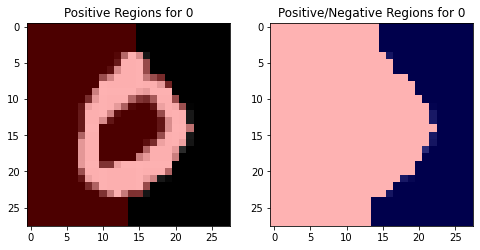

In [115]:
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(label))
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=10, hide_rest=False, min_weight = 0.01)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(label))

## Explainability with captum

In [5]:
from captum.attr import IntegratedGradients

In [41]:
alg = mnist_algorithm_generator(experiment).fit()

2022-06-09 12:20:58.638 | INFO     | src.beam.experiment:run:425 - Single worker mode
2022-06-09 12:20:58.638 | INFO     | src.beam.experiment:run_worker:45 - Worker: 1/1 is running...


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-09 12:21:00.637 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 5/2:
2022-06-09 12:21:00.644 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-09 12:21:00.645 | INFO     | src.beam.experiment:log_data:344 - loss 0.335916 	|
2022-06-09 12:21:00.646 | INFO     | src.beam.experiment:log_data:344 - acc 0.907184 	|
2022-06-09 12:21:00.646 | INFO     | src.beam.experiment:log_data:344 - lr 0.00099 	|
2022-06-09 12:21:00.647 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-09 12:21:00.647 | INFO     | src.beam.experiment:log_data:344 - loss 0.128026 	|
2022-06-09 12:21:00.648 | INFO     | src.beam.experiment:log_data:344 - acc 0.960727 	|


train:   0%|          | 0/389 [00:00<?, ?it/s]

validation:   0%|          | 0/389 [00:00<?, ?it/s]


2022-06-09 12:21:02.601 | INFO     | src.beam.experiment:save_model_results:302 - Finished epoch 6/2:
2022-06-09 12:21:02.607 | INFO     | src.beam.experiment:log_data:340 - train:
2022-06-09 12:21:02.607 | INFO     | src.beam.experiment:log_data:344 - loss 0.0849223 	|
2022-06-09 12:21:02.608 | INFO     | src.beam.experiment:log_data:344 - acc 0.973781 	|
2022-06-09 12:21:02.608 | INFO     | src.beam.experiment:log_data:344 - lr 0.0009801 	|
2022-06-09 12:21:02.609 | INFO     | src.beam.experiment:log_data:340 - validation:
2022-06-09 12:21:02.609 | INFO     | src.beam.experiment:log_data:344 - loss 0.0955592 	|
2022-06-09 12:21:02.610 | INFO     | src.beam.experiment:log_data:344 - acc 0.971672 	|


In [60]:
x = alg.dataset[10001]['x'].flatten().unsqueeze(0).to(experiment.device)
baseline = torch.zeros(28, 28).flatten().unsqueeze(0).to(experiment.device)
net.eval()

LinearNet(
  (lin): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [61]:
ig = IntegratedGradients(net)
attributions, delta = ig.attribute(x, baseline, target=0, return_convergence_delta=True)
# print('IG Attributions:', attributions)
# print('Convergence Delta:', delta)

In [62]:
import matplotlib.pyplot as plt

In [63]:
attributions = attributions.reshape(28, 28).cpu().numpy()

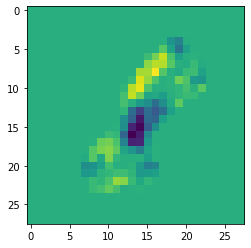

In [64]:
plt.imshow(attributions)

## Performance measurements

In [4]:
labels = np.load('/home/nir/projects/Exercise_1/labels.npy')

In [5]:
import pandas as pd

In [6]:
pd.Series(labels).value_counts()

0    92634
1     1312
dtype: int64

In [7]:
from sklearn.utils import compute_sample_weight
weight_factor = 1

In [8]:
probs = compute_sample_weight('balanced', y=labels) ** weight_factor

In [9]:
pd.Series(probs).value_counts()

0.507082     92634
35.802591     1312
dtype: int64

In [34]:
d = UniversalDataset(np.arange(len(labels)))

In [35]:
d.split(validation=.2, test=.2, seed=5782, stratify=True, labels=labels, test_split_method='time_based')

In [38]:
len(d)

93946

In [19]:
d.build_samplers(128, oversample=True)

In [21]:
d.samplers['train'].indices

tensor([  785,   785,   785,  ..., 50927, 50927, 50927])

In [23]:
pd.Series(labels[d.samplers['validation'].indices]).value_counts()

1    1666637
0    1664010
dtype: int64

In [112]:
s = UniversalBatchSampler(len(labels), 128, probs=probs)

In [115]:
len(s.indices)

10002268

In [116]:
pd.Series(labels[s.indices]).value_counts()

0    5002236
1    5000032
dtype: int64

## Ray and Optuna

In [116]:
import torch
import torch.optim as optim
from ray.tune.examples.mnist_pytorch import get_data_loaders, ConvNet, train, test
import optuna


def train_mnist(trial):
   use_cuda = torch.cuda.is_available()
   device = torch.device("cuda" if use_cuda else "cpu")
   train_loader, test_loader = get_data_loaders()
   model = ConvNet().to(device)

   optimizer = optim.SGD(
       model.parameters(),
       lr=trial.suggest_loguniform("lr", 1e-4, 1e-2),
       momentum=trial.suggest_uniform("momentum", 0.1, 0.9))

   for i in range(20):
       train(model, optimizer, train_loader, device)
       acc = test(model, test_loader, device)
       trial.report(-acc, i)
   return -acc


import time
start = time.time()
study = optuna.create_study()
study.optimize(train_mnist, n_jobs=1, n_trials=10)
taken = time.time() - start
print(f"Time taken: {taken:.2f} seconds.")
print(f"Best config: {study.best_params}")

[I 2022-06-12 07:03:51,432] A new study created in memory with name: no-name-8fb0ec83-bd8b-4038-a67d-4cae7faacd49


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw



[I 2022-06-12 07:04:02,232] Trial 0 finished with value: -0.36875 and parameters: {'lr': 0.0001278405133611165, 'momentum': 0.8305986193083477}. Best is trial 0 with value: -0.36875.
[I 2022-06-12 07:04:04,906] Trial 1 finished with value: -0.409375 and parameters: {'lr': 0.0006655628766944698, 'momentum': 0.7231796457415468}. Best is trial 1 with value: -0.409375.
[I 2022-06-12 07:04:07,583] Trial 2 finished with value: -0.44375 and parameters: {'lr': 0.00080728999151233, 'momentum': 0.47977484540221194}. Best is trial 2 with value: -0.44375.
[I 2022-06-12 07:04:10,548] Trial 3 finished with value: -0.23125 and parameters: {'lr': 0.00015211327327016415, 'momentum': 0.8450571382696139}. Best is trial 2 with value: -0.44375.
[I 2022-06-12 07:04:13,231] Trial 4 finished with value: -0.21875 and parameters: {'lr': 0.0004514341183546026, 'momentum': 0.2731703000259097}. Best is trial 2 with value: -0.44375.
[I 2022-06-12 07:04:15,894] Trial 5 finished with value: -0.14375 and parameters: {

Time taken: 35.15 seconds.
Best config: {'lr': 0.0024029076692787927, 'momentum': 0.5259701490493066}


In [117]:
import torch
import torch.optim as optim
from ray.tune.examples.mnist_pytorch import get_data_loaders, ConvNet, train, test
from ray import tune
from ray.tune.suggest.optuna import OptunaSearch


def train_mnist(config):
   use_cuda = torch.cuda.is_available()
   device = torch.device("cuda" if use_cuda else "cpu")
   train_loader, test_loader = get_data_loaders()
   model = ConvNet().to(device)

   optimizer = optim.SGD(
       model.parameters(), lr=config["lr"], momentum=config["momentum"])

   for i in range(20):
       train(model, optimizer, train_loader, device)
       acc = test(model, test_loader, device)
       tune.report(mean_accuracy=acc)


import time
start = time.time()
analysis = tune.run(
   train_mnist,
   config={
       "lr": tune.loguniform(1e-4, 1e-2),
       "momentum": tune.uniform(0.1, 0.9),
   },
   metric="mean_accuracy",
   mode="max",
   search_alg=OptunaSearch(),
   num_samples=10)
taken = time.time() - start
print(f"Time taken: {taken:.2f} seconds.")
print(f"Best config: {analysis.best_config}")

2022-06-12 07:15:44,559	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265
2022-06-12 07:15:46,579	WARNING function_runner.py:598 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
[I 2022-06-12 07:15:46,592] A new study created in memory with name: optuna
2022-06-12 07:15:46,611	WARNING tune.py:636 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, set tune.run(resources_per_trial={'gpu': 1}...) which allows Tune to expose 1 GPU to each trial. You can also override `Trainable.default_resource_request` if using the Trainable API.
2022-06-12 07:15:46,926	INFO trial_runner.py:803 -- starting train_mnist_7ad05044


Trial name,status,loc,lr,momentum
train_mnist_7ad05044,RUNNING,172.17.0.7:4363,0.00160988,0.687499


2022-06-12 07:15:48,923	INFO trial_runner.py:803 -- starting train_mnist_7c22184c
2022-06-12 07:15:48,941	INFO trial_runner.py:803 -- starting train_mnist_7c249dba
2022-06-12 07:15:48,959	INFO trial_runner.py:803 -- starting train_mnist_7c278a52
2022-06-12 07:15:48,977	INFO trial_runner.py:803 -- starting train_mnist_7c2a0dcc
2022-06-12 07:15:48,994	INFO trial_runner.py:803 -- starting train_mnist_7c2d02ac
2022-06-12 07:15:49,011	INFO trial_runner.py:803 -- starting train_mnist_7c2f5e3a
2022-06-12 07:15:49,027	INFO trial_runner.py:803 -- starting train_mnist_7c323ab0
2022-06-12 07:15:49,043	INFO trial_runner.py:803 -- starting train_mnist_7c348888
2022-06-12 07:15:49,060	INFO trial_runner.py:803 -- starting train_mnist_7c3728f4


Result for train_mnist_7ad05044:
  date: 2022-06-12_07-15-49
  done: false
  experiment_id: 6110397f6a354358ba5c24d3a5ccc18f
  hostname: 56f38f239d73
  iterations_since_restore: 1
  mean_accuracy: 0.0875
  node_ip: 172.17.0.7
  pid: 4363
  time_since_restore: 0.33464622497558594
  time_this_iter_s: 0.33464622497558594
  time_total_s: 0.33464622497558594
  timestamp: 1655018149
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7ad05044
  warmup_time: 0.004679441452026367
  
Result for train_mnist_7c323ab0:
  date: 2022-06-12_07-15-51
  done: false
  experiment_id: b6963e8cb8b8413fa5c242ba80f0bbea
  hostname: 56f38f239d73
  iterations_since_restore: 1
  mean_accuracy: 0.134375
  node_ip: 172.17.0.7
  pid: 4417
  time_since_restore: 0.31108617782592773
  time_this_iter_s: 0.31108617782592773
  time_total_s: 0.31108617782592773
  timestamp: 1655018151
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7c323ab0
  warmup_time: 0.004642486572265625
  
Result for t

Trial name,status,loc,lr,momentum,acc,iter,total time (s)
train_mnist_7ad05044,RUNNING,172.17.0.7:4363,0.00160988,0.687499,0.421875,13,3.02496
train_mnist_7c22184c,RUNNING,172.17.0.7:4399,0.000125965,0.334005,0.059375,3,0.797441
train_mnist_7c249dba,RUNNING,172.17.0.7:4401,0.00945013,0.620565,,,
train_mnist_7c278a52,RUNNING,172.17.0.7:4404,0.00920713,0.855533,0.609375,2,0.759091
train_mnist_7c2a0dcc,RUNNING,172.17.0.7:4407,0.00733988,0.155399,0.353125,4,0.852635
train_mnist_7c2d02ac,RUNNING,172.17.0.7:4410,0.000375022,0.46964,0.078125,2,0.75666
train_mnist_7c2f5e3a,RUNNING,172.17.0.7:4413,0.000654276,0.244808,0.08125,1,0.714079
train_mnist_7c323ab0,RUNNING,172.17.0.7:4417,0.000356673,0.813501,0.225,4,0.840244
train_mnist_7c348888,RUNNING,172.17.0.7:4420,0.00119714,0.554578,0.125,1,0.74924
train_mnist_7c3728f4,RUNNING,172.17.0.7:4423,0.000659416,0.355107,,,


Result for train_mnist_7c249dba:
  date: 2022-06-12_07-15-52
  done: false
  experiment_id: 5db90f0948384115948633c879a54301
  hostname: 56f38f239d73
  iterations_since_restore: 1
  mean_accuracy: 0.3125
  node_ip: 172.17.0.7
  pid: 4401
  time_since_restore: 0.969139814376831
  time_this_iter_s: 0.969139814376831
  time_total_s: 0.969139814376831
  timestamp: 1655018152
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7c249dba
  warmup_time: 0.004343986511230469
  
Result for train_mnist_7c3728f4:
  date: 2022-06-12_07-15-52
  done: false
  experiment_id: fd9a65d328974605aee3d5463c024c26
  hostname: 56f38f239d73
  iterations_since_restore: 1
  mean_accuracy: 0.11875
  node_ip: 172.17.0.7
  pid: 4423
  time_since_restore: 0.8235781192779541
  time_this_iter_s: 0.8235781192779541
  time_total_s: 0.8235781192779541
  timestamp: 1655018152
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 7c3728f4
  warmup_time: 0.005570173263549805
  
Result for train_mnist

Trial name,status,loc,lr,momentum,acc,iter,total time (s)
train_mnist_7ad05044,TERMINATED,172.17.0.7:4363,0.00160988,0.687499,0.68125,20,4.53144
train_mnist_7c22184c,TERMINATED,172.17.0.7:4399,0.000125965,0.334005,0.09375,20,3.96014
train_mnist_7c249dba,TERMINATED,172.17.0.7:4401,0.00945013,0.620565,0.878125,20,4.44058
train_mnist_7c278a52,TERMINATED,172.17.0.7:4404,0.00920713,0.855533,0.89375,20,4.10801
train_mnist_7c2a0dcc,TERMINATED,172.17.0.7:4407,0.00733988,0.155399,0.796875,20,4.01385
train_mnist_7c2d02ac,TERMINATED,172.17.0.7:4410,0.000375022,0.46964,0.221875,20,4.21529
train_mnist_7c2f5e3a,TERMINATED,172.17.0.7:4413,0.000654276,0.244808,0.1625,20,4.20057
train_mnist_7c323ab0,TERMINATED,172.17.0.7:4417,0.000356673,0.813501,0.6125,20,3.75466
train_mnist_7c348888,TERMINATED,172.17.0.7:4420,0.00119714,0.554578,0.590625,20,4.26552
train_mnist_7c3728f4,TERMINATED,172.17.0.7:4423,0.000659416,0.355107,0.175,20,4.27929


2022-06-12 07:15:55,783	INFO tune.py:701 -- Total run time: 9.21 seconds (9.04 seconds for the tuning loop).


Time taken: 13.62 seconds.
Best config: {'lr': 0.009207129642301522, 'momentum': 0.8555327667174564}
